# Fashion-MNIST

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:

| Label | Description |
|---|---|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, Dropout, Activation

## 1. Load the dataset.

In [10]:
# Load the dataset.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Set the number of classes.
num_classes = np.max(y_train) + 1

# Set the labels.
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
          "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

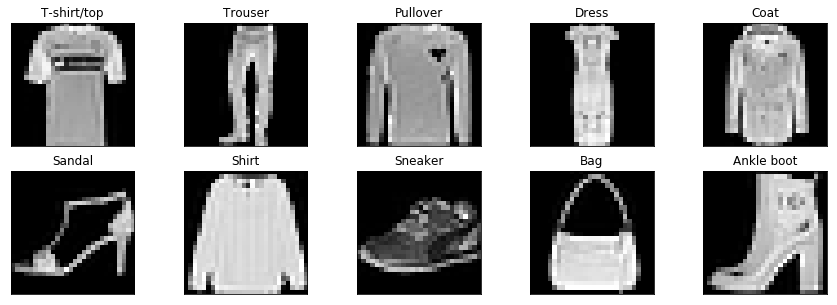

In [11]:
# Display an image for each class.
fig = plt.figure(figsize=(15,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:] == i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    plt.imshow(im, cmap="gray")
    plt.title("{}".format(labels[i]))
plt.show()

## 2. Handle the data.

In [21]:
# Reshape as channel first.
size_tr = x_train.shape
size_te = x_test.shape
x_tr = x_train.reshape(size_tr[0], size_tr[1], size_tr[2], 1)
x_te = x_test.reshape(size_te[0], size_te[1], size_te[2], 1)

# Process the images.
x_tr = x_tr / 255
x_te = x_te / 255

# Display the images size.
print("x_tr size = {}".format(x_tr.shape))
print("x_te size = {}".format(x_te.shape))

x_tr size = (60000, 28, 28, 1)
x_te size = (10000, 28, 28, 1)


In [22]:
# Process the classes.
y_tr = to_categorical(y_train, num_classes)
y_te = to_categorical(y_test, num_classes)

# Display the classes size.
print("y_tr size = {}".format(y_tr.shape))
print("y_te size = {}".format(y_te.shape))

y_tr size = (60000, 10)
y_te size = (10000, 10)


## 3. Train the model.

In [23]:
# Initialise the the model.
model = Sequential()

# First convolutional layer.
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation="relu",
                 data_format="channels_last",
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer.
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layer.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes, activation='softmax'))
# Set the optimizer.
optimizer = keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile the model.
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Parameter fitting.
fit_params = {
    "batch_size": 128,
    "epochs": 10,
    "verbose": 1,
    "shuffle": True,
    "validation_data": (x_te, y_te)
}

# Fit the model.
history = model.fit(x_tr, y_tr, **fit_params)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 50s 839us/step - loss: 0.5877 - acc: 0.7869 - val_loss: 0.4119 - val_acc: 0.8557
Epoch 2/10
60000/60000 [==============================] - 50s 828us/step - loss: 0.3690 - acc: 0.8674 - val_loss: 0.3316 - val_acc: 0.8799
Epoch 3/10
60000/60000 [==============================] - 47s 785us/step - loss: 0.3143 - acc: 0.8877 - val_loss: 0.2975 - val_acc: 0.8919
Epoch 4/10
60000/60000 [==============================] - 47s 776us/step - loss: 0.2835 - acc: 0.8978 - val_loss: 0.2812 - val_acc: 0.8985
Epoch 5/10
60000/60000 [==============================] - 47s 776us/step - loss: 0.2604 - acc: 0.9052 - val_loss: 0.2704 - val_acc: 0.9020
Epoch 6/10
60000/60000 [==============================] - 45s 758us/step - loss: 0.2433 - acc: 0.9105 - val_loss: 0.2597 - val_acc: 0.9037
Epoch 7/10
60000/60000 [==============================] - 45s 757us/step - loss: 0.2297 - acc: 0.9159 - val_loss: 0.

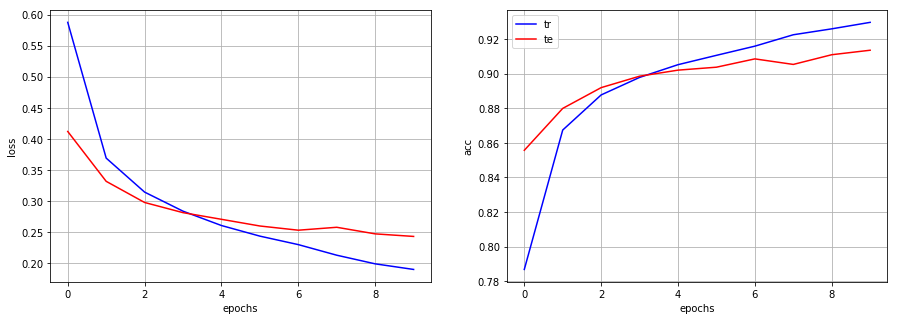

In [24]:
# Visualise the training resuls.
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history["loss"], color="b", label="tr")
plt.plot(history.history["val_loss"], color="r", label="te")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid()
plt.subplot(122)
plt.plot(history.history["acc"], color="b", label="tr")
plt.plot(history.history["val_acc"], color="r", label="te")
plt.ylabel("acc")
plt.xlabel("epochs")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Save the model.
model.save("models/fashion_mnist.h5")

## 4. Evaluate the model.

In [ ]:
# Set the model filepath.
filepath = "models/fashion_mnist.h5"

# Load the model.
model = keras.models.load_model(filepath)

In [ ]:
# Model test inference.
y_pred = model.predict(x_te)
y_pred = np.eye(num_classes)[np.argmax(y_pred, axis=1).reshape(-1)]

# Display the classification report.
print(classification_report(y_te, y_pred, target_names=labels, digits=4))